<a href="https://colab.research.google.com/github/AkshayAI007/AirBnB-Bookings-Analysis-/blob/main/Supervised_ML_for_Bikesharing_Demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing datetime for correctly formatting the date
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

#For Model Building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#For Model Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

#For Handling Warnings
import warnings
warnings.filterwarnings('ignore')

# **Reading Data and Storing into Dataframe**

In [3]:
path= '/content/SeoulBikeData.csv'
bike_sharing_df = pd.read_csv(path, encoding = 'unicode_escape')

# **Exploring Dataset**

In [4]:
#Checking top 5 rows of dataset
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#Checking bottom 5 rows of dataset
bike_sharing_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#Checking Shape of Dataset
bike_sharing_df.shape

(8760, 14)

In [8]:
#Printing the attributes
print("Features of the dataset: ")
bike_sharing_df.columns

Features of the dataset: 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#Understanding the datatype of each attribute
bike_sharing_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [10]:
#Detailed information about dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
#Finding total number of unique values of feature
bike_sharing_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
#Analysing both categorical and numerical values in dataset
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
#Creating copy of dataset before working with it so that original data remains untouched
df = bike_sharing_df.copy()

# **Data preprocessing**

In [14]:
#Checking for Null Values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [15]:
#Checking for duplicates
df.duplicated().sum()

0

# **Observation :**
The dataframe does not contain any null values or duplicate values.
If there were missing values we would have either dropped the null values or replaced it with mean/mode , based on the dataset.

In [17]:
#Splitting "Date" column into three other columns namely "year", "month", "day", so that we can analyze the Bike rentals with respect to year, month and day
df['Date'] = df['Date'].astype('datetime64[ns]')

In [18]:
#Creating new attributes 'Month', 'Year', 'Day'
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year

In [19]:
# Creating new attribute and Encoding with 1 if its weekend and 0 if its Weekdays.
df['weekdays_weekend'] = df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [20]:
#Checking newly created attributes
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0


In [21]:
#Dropping 'Day', 'Date', 'Year' attributes
df.drop(['Date','Day','Year'],axis=1, inplace=True)

So we converted the "date" attribute into 3 different attributes i.e "year","month","day".

The "year" attribute in our data set basically contains 2 unique numbers, the details from December 2017 to November 2018 so if I consider this as one year then we don't need the "year" attribute so we drop it.

The other attribute "day", contains the details about each day of the month, for our analysis, we don't need the data of each day of each month, all we need from the data is, if a day is a weekday or a weekend, so we convert it into this format and drop the "day" column.

In [22]:
#Updated dataframe
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [24]:
#Value count weekdays_weekend categories
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [26]:
#Value count for Seasons categories
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [27]:
#Value count for Holiday categories
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [28]:
#Value count for Functioning_Day categories
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [29]:
#Value count for Month categories
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

# **Exploratory Data Analysis**

# **Number of Bikes Rented Monthly**

[Text(0.5, 1.0, 'Number of Bikes Rented Monthly')]

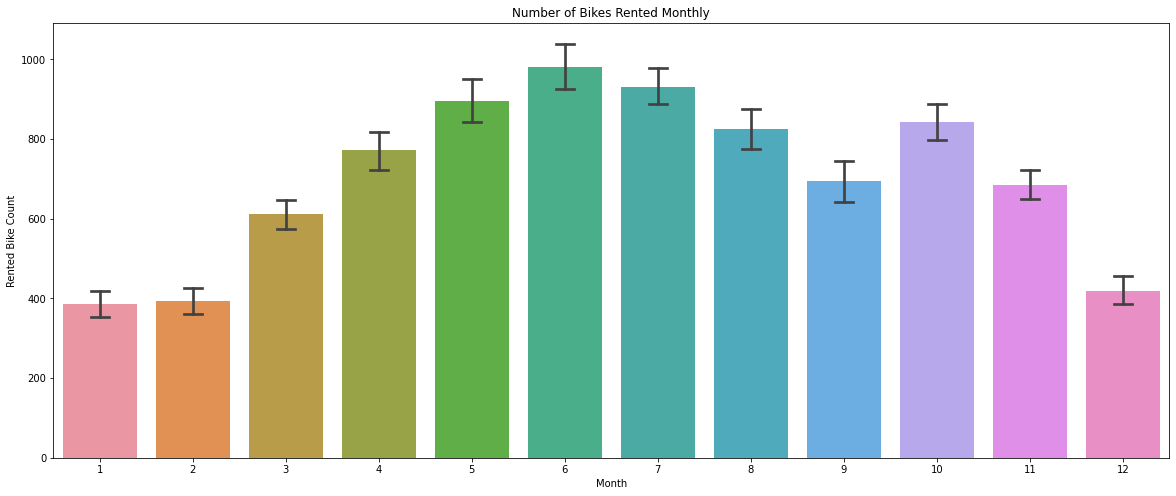

In [33]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Month', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Number of Bikes Rented Monthly')

**Observation**

From the above Bar chart it can be clearly stated that the numbers of bike rented were comparitively higher from May to October with June been the month where most numbers of bikes rented.

# **Count of Rented Bikes according to Hour**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Hour')]

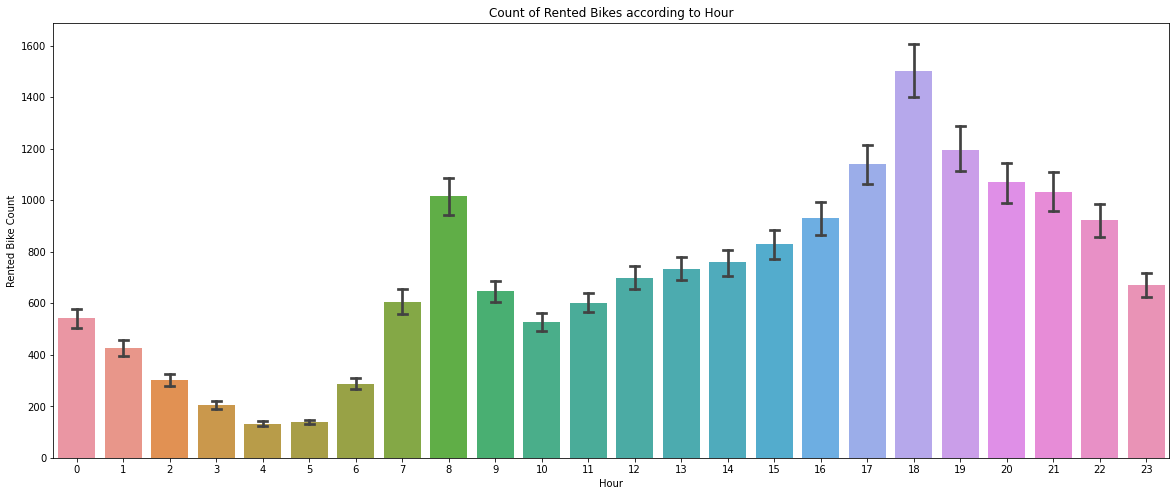

In [35]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Hour', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Hour')

**Observation**

From the above plot we can say that the use of rented bikes are high from 7am-9am and 5pm-8pm.

# **Bike Rented during Weekdays and Weekend**

[Text(0.5, 1.0, 'Bike Rented during Weekdays and Weekend')]

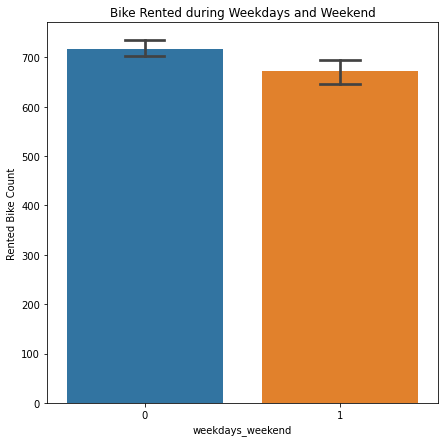

In [36]:
fig,ax=plt.subplots(figsize=(7,7))
sns.barplot(data=df, x='weekdays_weekend', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Bike Rented during Weekdays and Weekend')

# **Count of Hourly Rented Bikes on Weekdays and Weekend**

[Text(0.5, 1.0, 'Count of Hourly Rented Bikes on Weekdays and Weekend ')]

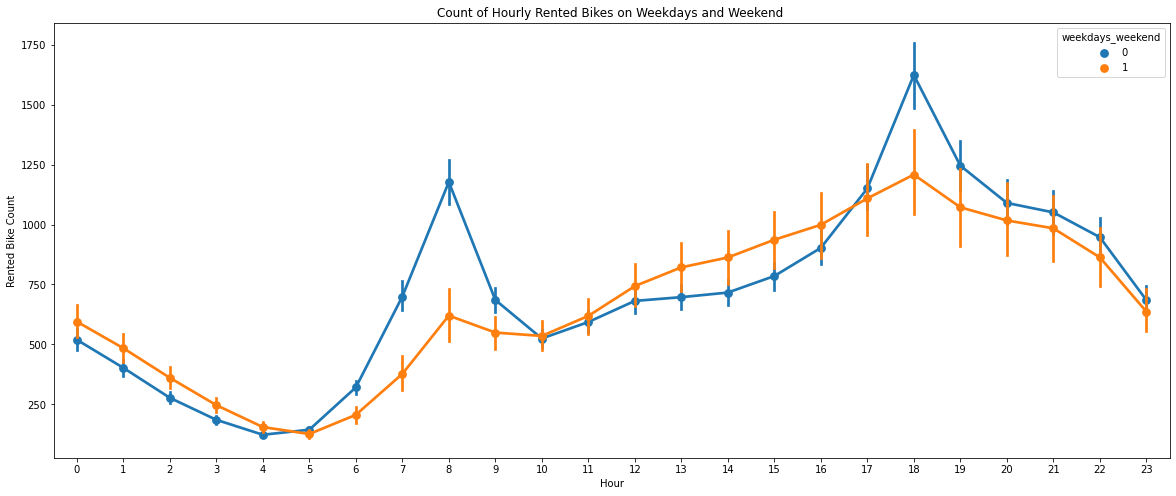

In [37]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='weekdays_weekend')
ax.set(title='Count of Hourly Rented Bikes on Weekdays and Weekend ')

**Observation**

On the above graph,

*   Blue Line    = Weekdays
*   Orange Line  = Weekend

From the above point plot, we can say that the demand of the bikes is higher on weekdays than on the weekends.

Peak Time are between 7am-9am and 5pm-9pm.

# **Count of Rented Bikes according to Functioning Day**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Functioning Day')]

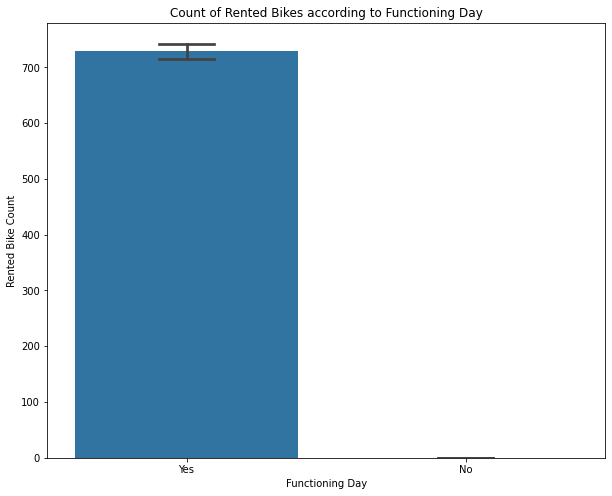

In [38]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df, x='Functioning Day', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Functioning Day')

**Observation**

From the above bar plot and point plot which shows the use of rented bikes on functioning day and non functioning Day, we can say that, Peoples dont use reneted bikes on non functioning days.

[Text(0.5, 1.0, 'Count of Rented Bikes according to Functioning Day')]

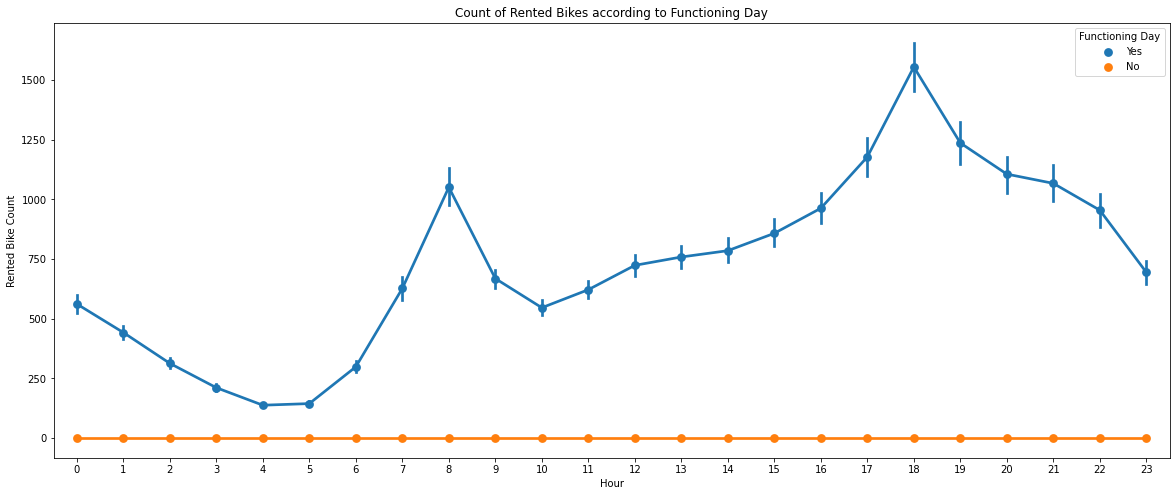

In [39]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Functioning Day')
ax.set(title='Count of Rented Bikes according to Functioning Day')

**Observation**

We can also say from the above that count of rented bikes are high between 7am-9am and 5pm-7pm

# **Season Wise Analysis**

[Text(0.5, 1.0, 'Season Wise Demand of Rented Bikes')]

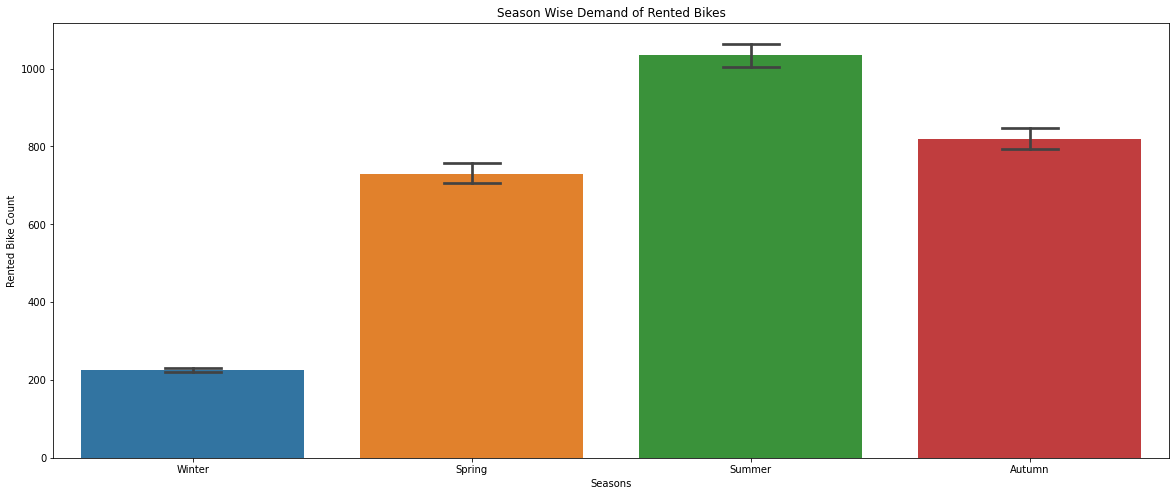

In [40]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Seasons', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Season Wise Demand of Rented Bikes')

**Observation**

Demand for bike is most During Summer season, whilst this demand exponentially decreases in Winter.

This decline in demand during winter season can be attributed to bad weather conditions, heavy snowfall etc.

[Text(0.5, 1.0, 'Count of Rented Bikes according to Seasons')]

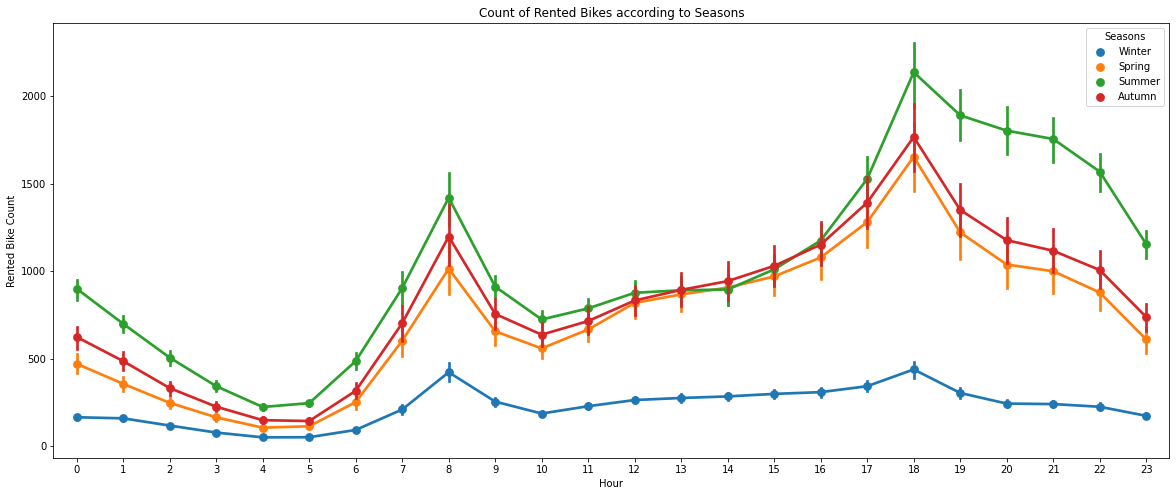

In [41]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')
ax.set(title='Count of Rented Bikes according to Seasons')

**Observation**

7-9 during day and 5-7 in the evening are the hours where Bike demand is at the peak, this trend is common for almost all seasons.

# **Demand During Normal Days and Holidays**

[Text(0.5, 1.0, 'Demand of Rented Bikes During Normal Days and Holidays')]

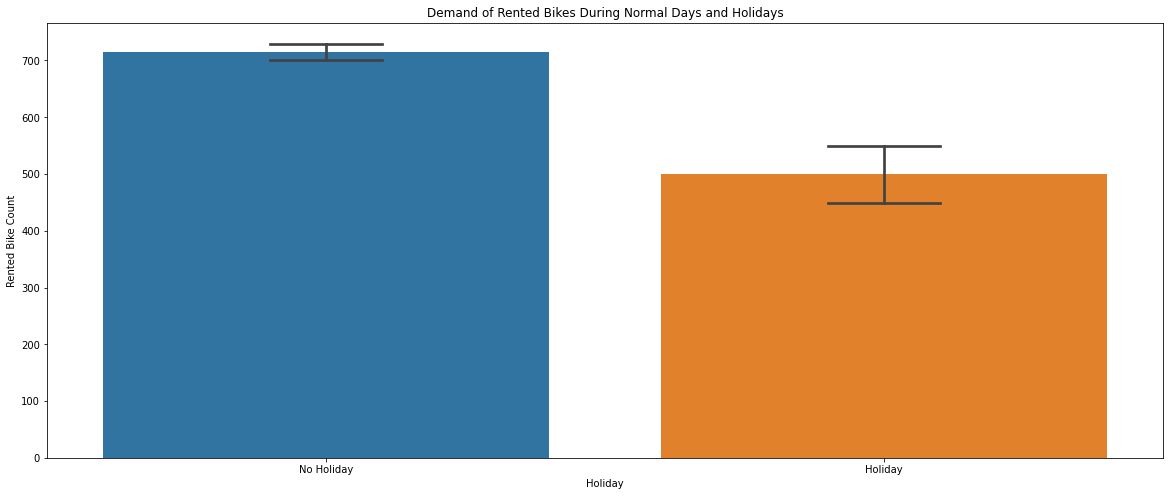

In [42]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Holiday', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Demand of Rented Bikes During Normal Days and Holidays')

**Observation**

From the above plot, we can say that the demand of the bikes is higher on Non Holiday  than on the Holidays.